In [165]:
import json

import joypy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [3]:
df = pd.read_csv("../data/USvideos.csv")
df.loc[:, "trending_date"] = pd.to_datetime(df.trending_date, format="%y.%d.%m")
df.loc[:, "publish_time"] = pd.to_datetime(df.publish_time)

In [4]:
df.loc[:, 'dt'] = df.trending_date.dt.year.astype(str)+'-'+df.trending_date.dt.month.astype(str)
df.loc[:, 'logview'] = np.log10(df.views)

In [90]:
views_mean = df.set_index("trending_date").resample('1w').views.mean()
views_std = df.set_index("trending_date").resample('1w').views.std()

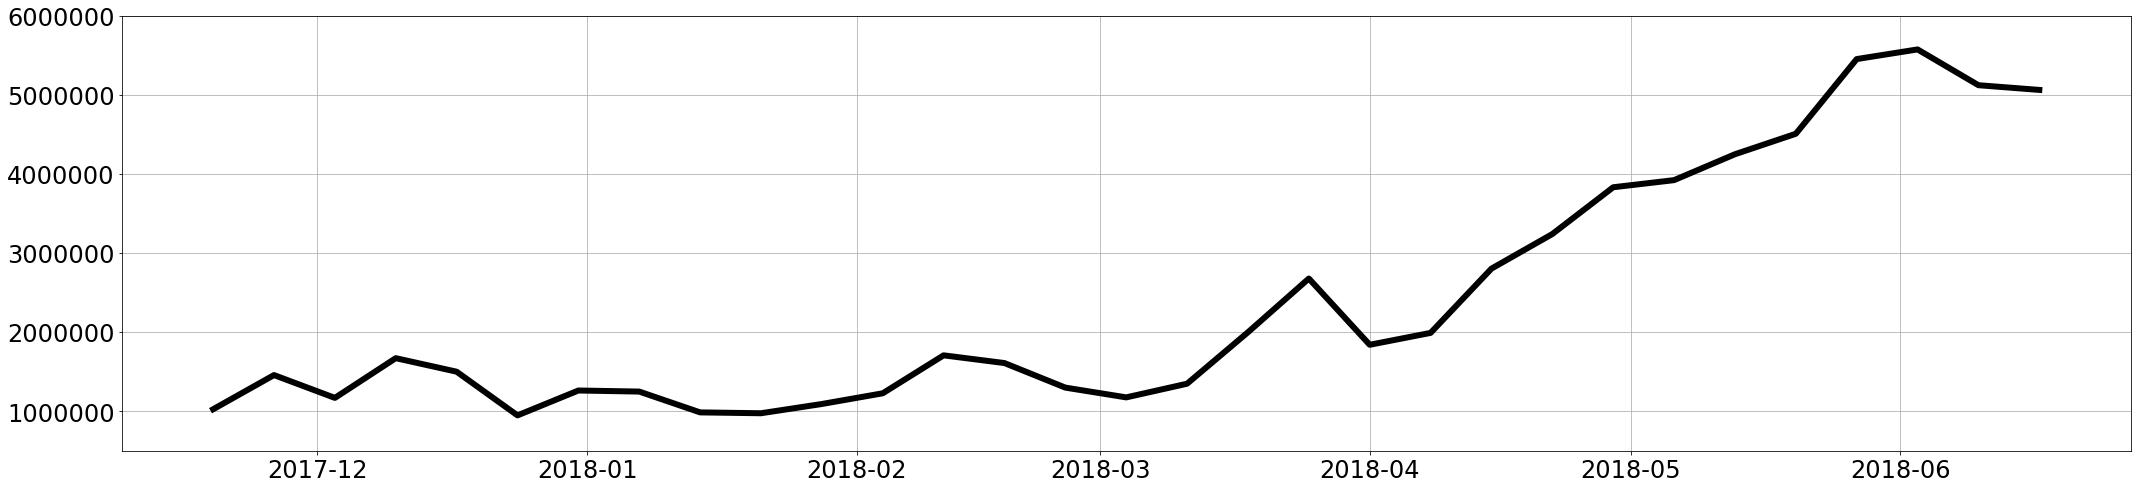

In [524]:
fig, ax = plt.subplots(1, 1, figsize=(36, 8));
ax.grid(True)
ax.plot(views_mean,
        color="#000000",
        linewidth=6);
plt.yticks(fontsize=24);
plt.xticks(fontsize=24);
plt.ylim(500000, 6000000)
fig.savefig("../weekly_views.png")

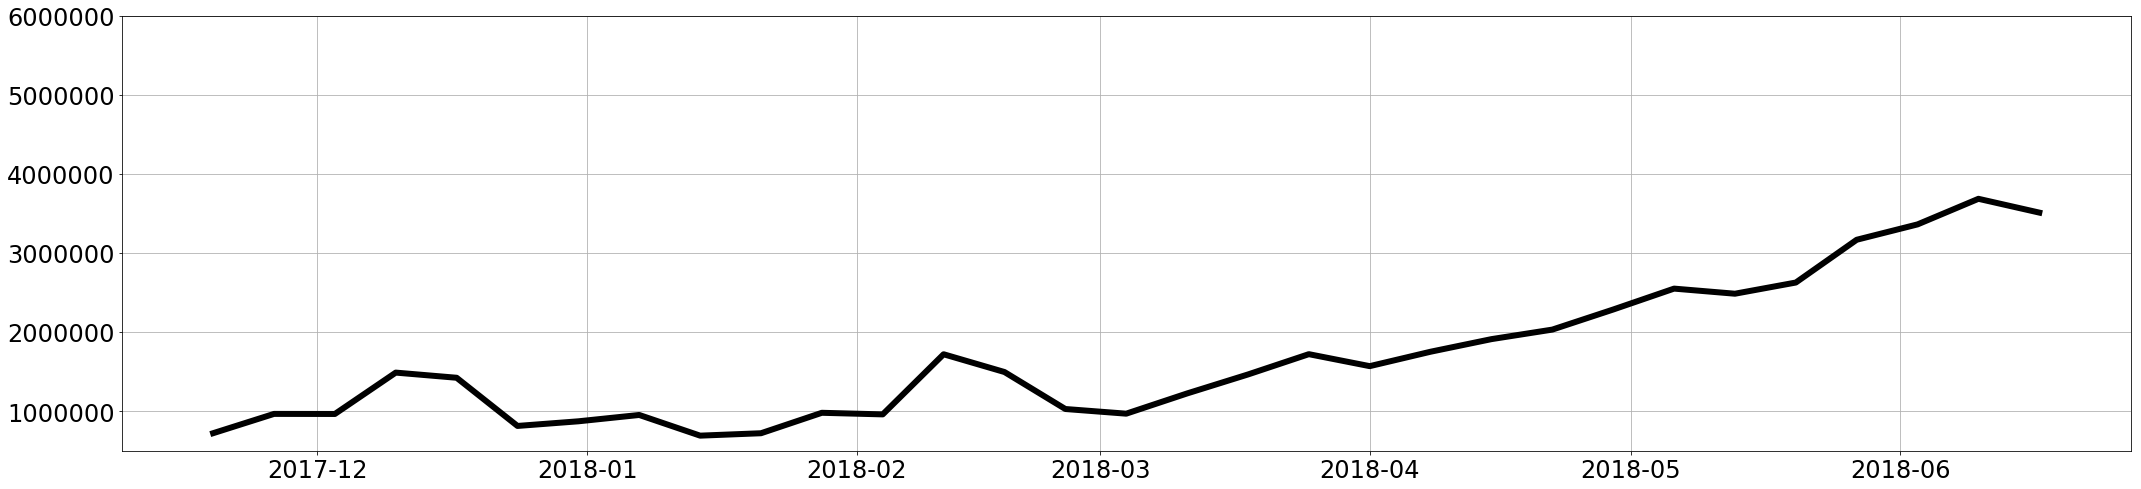

In [523]:
fig, ax = plt.subplots(1, 1, figsize=(36, 8));
ax.grid(True)
ax.plot(df[df.CategoryTitle!="Music"].set_index("trending_date").resample('1w').views.mean(),
        color="#000000",
        linewidth=6);
plt.yticks(fontsize=24);
plt.xticks(fontsize=24);
plt.ylim(500000, 6000000)
fig.savefig("../weekly_views_no_music.png")

In [500]:
df.loc[:, "transformed_likes"] = (df.likes-df.likes.mean())/df.likes.std()
df.loc[:, "transformed_dislikes"] = (df.dislikes-df.dislikes.mean())/df.dislikes.std()

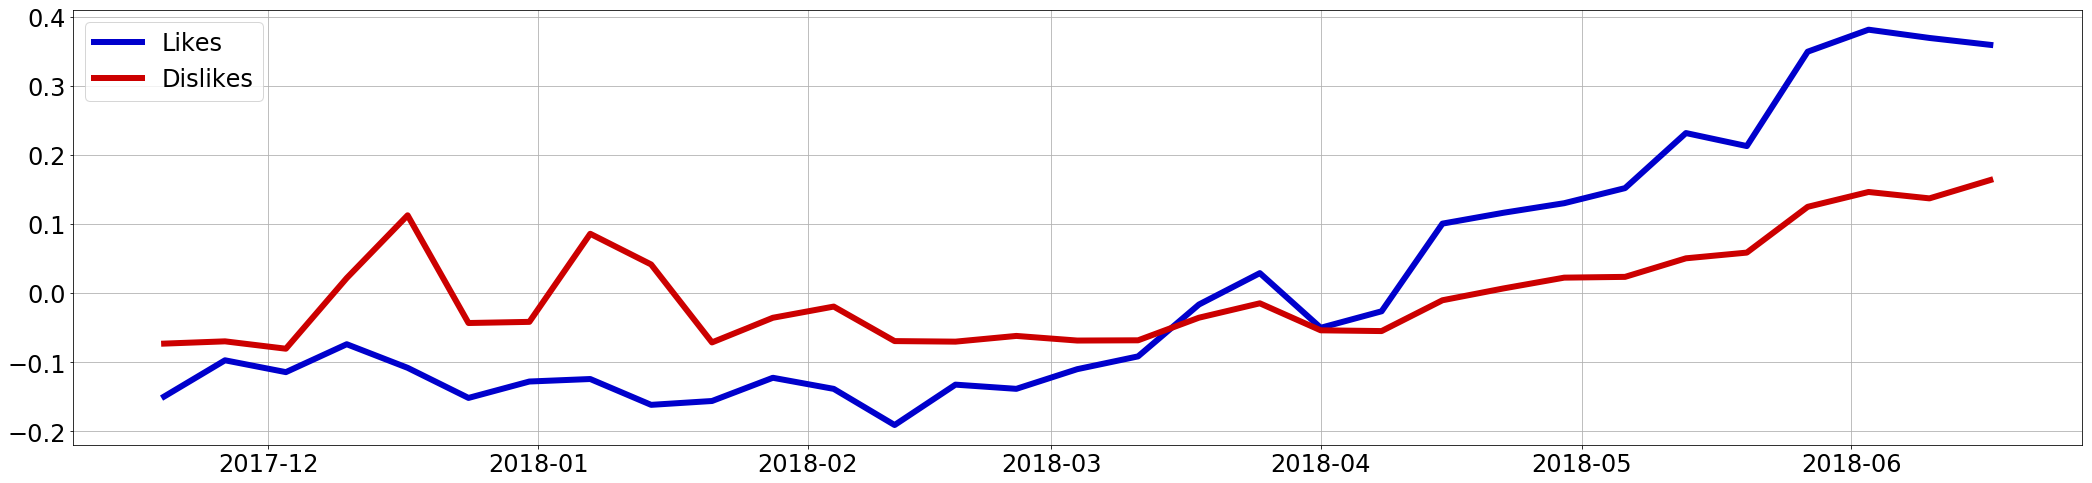

In [507]:
fig, ax = plt.subplots(1, 1, figsize=(36, 8));
ax.grid(True)
ax.plot(df.set_index("trending_date").resample("1w").transformed_likes.mean(),
        color="#0000cc",
        linewidth=6);
ax.plot(df.set_index("trending_date").resample("1w").transformed_dislikes.mean(),
        color="#cc0000",
        linewidth=6);
plt.yticks(fontsize=24);
plt.xticks(fontsize=24);
plt.legend(["Likes", "Dislikes"], loc="upper left", fontsize=24)
fig.savefig("../likes_dislikes_transformed_ts.png")

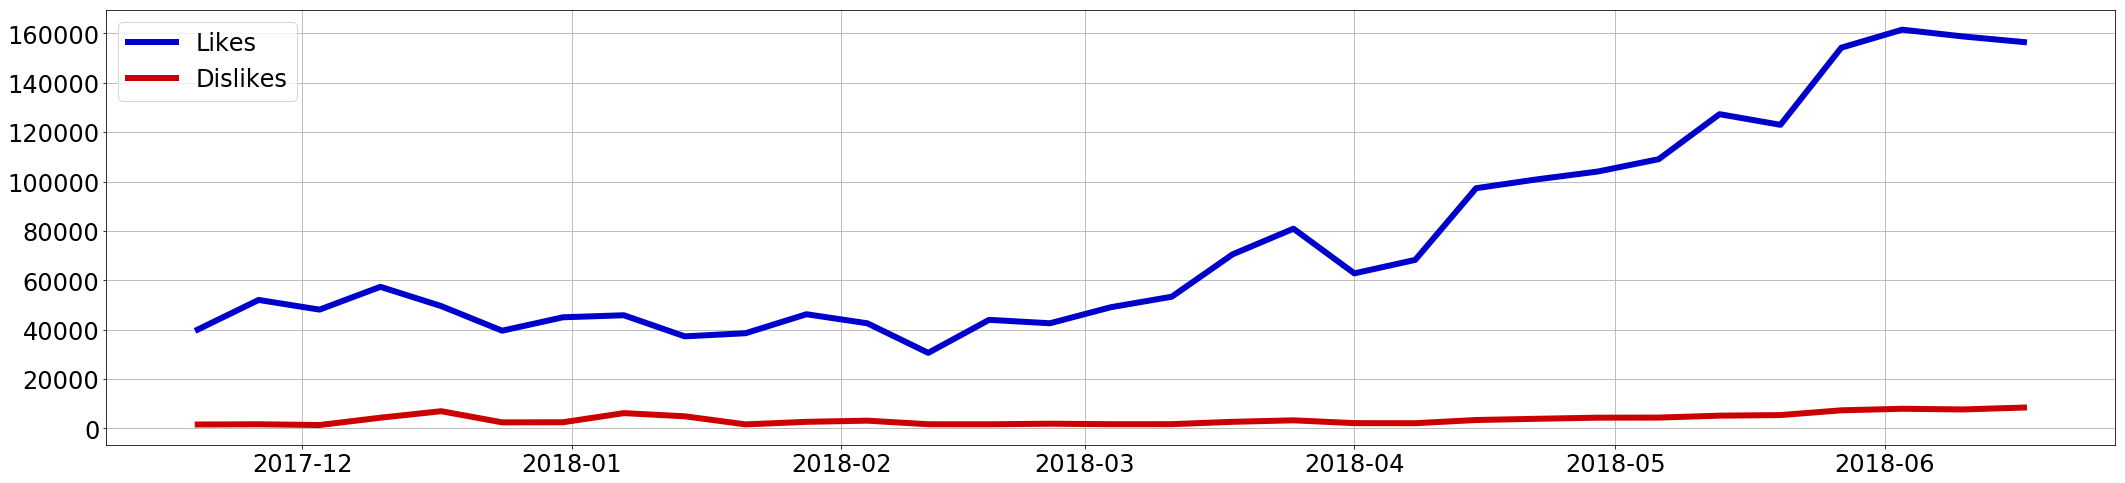

In [508]:
fig, ax = plt.subplots(1, 1, figsize=(36, 8));
ax.grid(True)
ax.plot(df.set_index("trending_date").resample("1w").likes.mean(),
        color="#0000cc",
        linewidth=6);
ax.plot(df.set_index("trending_date").resample("1w").dislikes.mean(),
        color="#cc0000",
        linewidth=6);
plt.yticks(fontsize=24);
plt.xticks(fontsize=24);
plt.legend(["Likes", "Dislikes"], loc="upper left", fontsize=24)
fig.savefig("../likes_dislikes_ts.png")

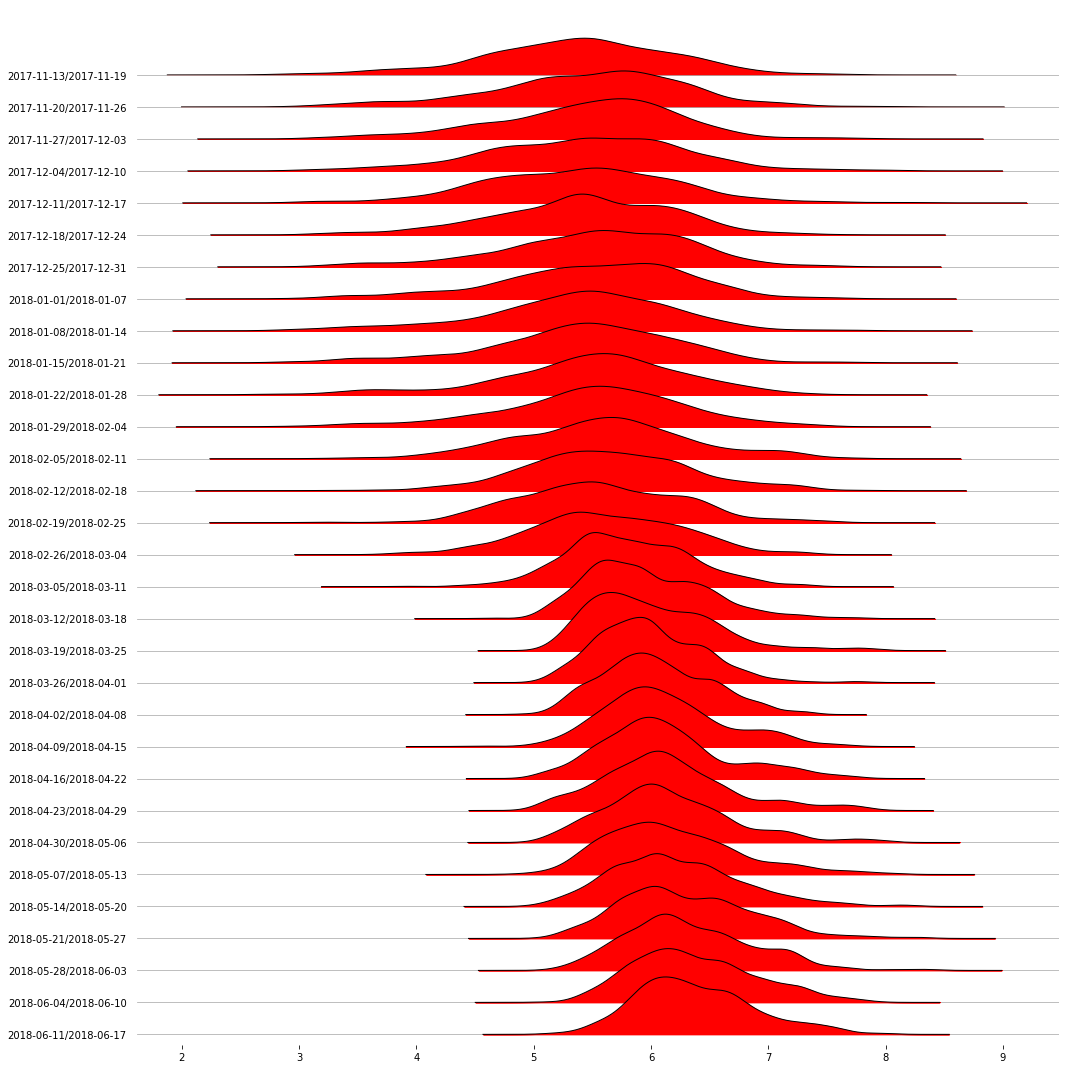

In [40]:
fig, axes = joypy.joyplot(np.log10(df.set_index("trending_date").to_period('w').views).reset_index(),
                          grid='y',
                          by="trending_date",
                          column="views",
                          range_style='own',
                          linewidth=1,
                          linecolor="black",
                          legend=False,
                          figsize=(15, 15),
                          color='#ff0000')
# fig.suptitle("Log10(Views)");
fig.savefig("../joyplot.png", bbox_inches='tight')

In [7]:
df.loc[:, "ratio"] = df.likes/df.dislikes

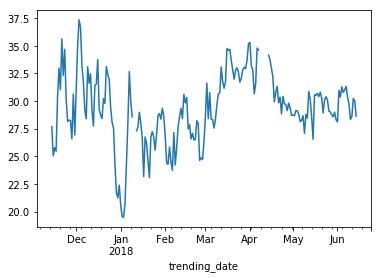

In [8]:
df.set_index('trending_date').resample('1d').ratio.median().plot();

In [130]:
with open("../data/US_category_id.json") as f:
    cats = json.load(f)

In [131]:
cat_map = {int(i['id']): i['snippet']['title'] for i in cats["items"]}

In [132]:
df.loc[:, "CategoryTitle"] = df.category_id.map(cat_map)

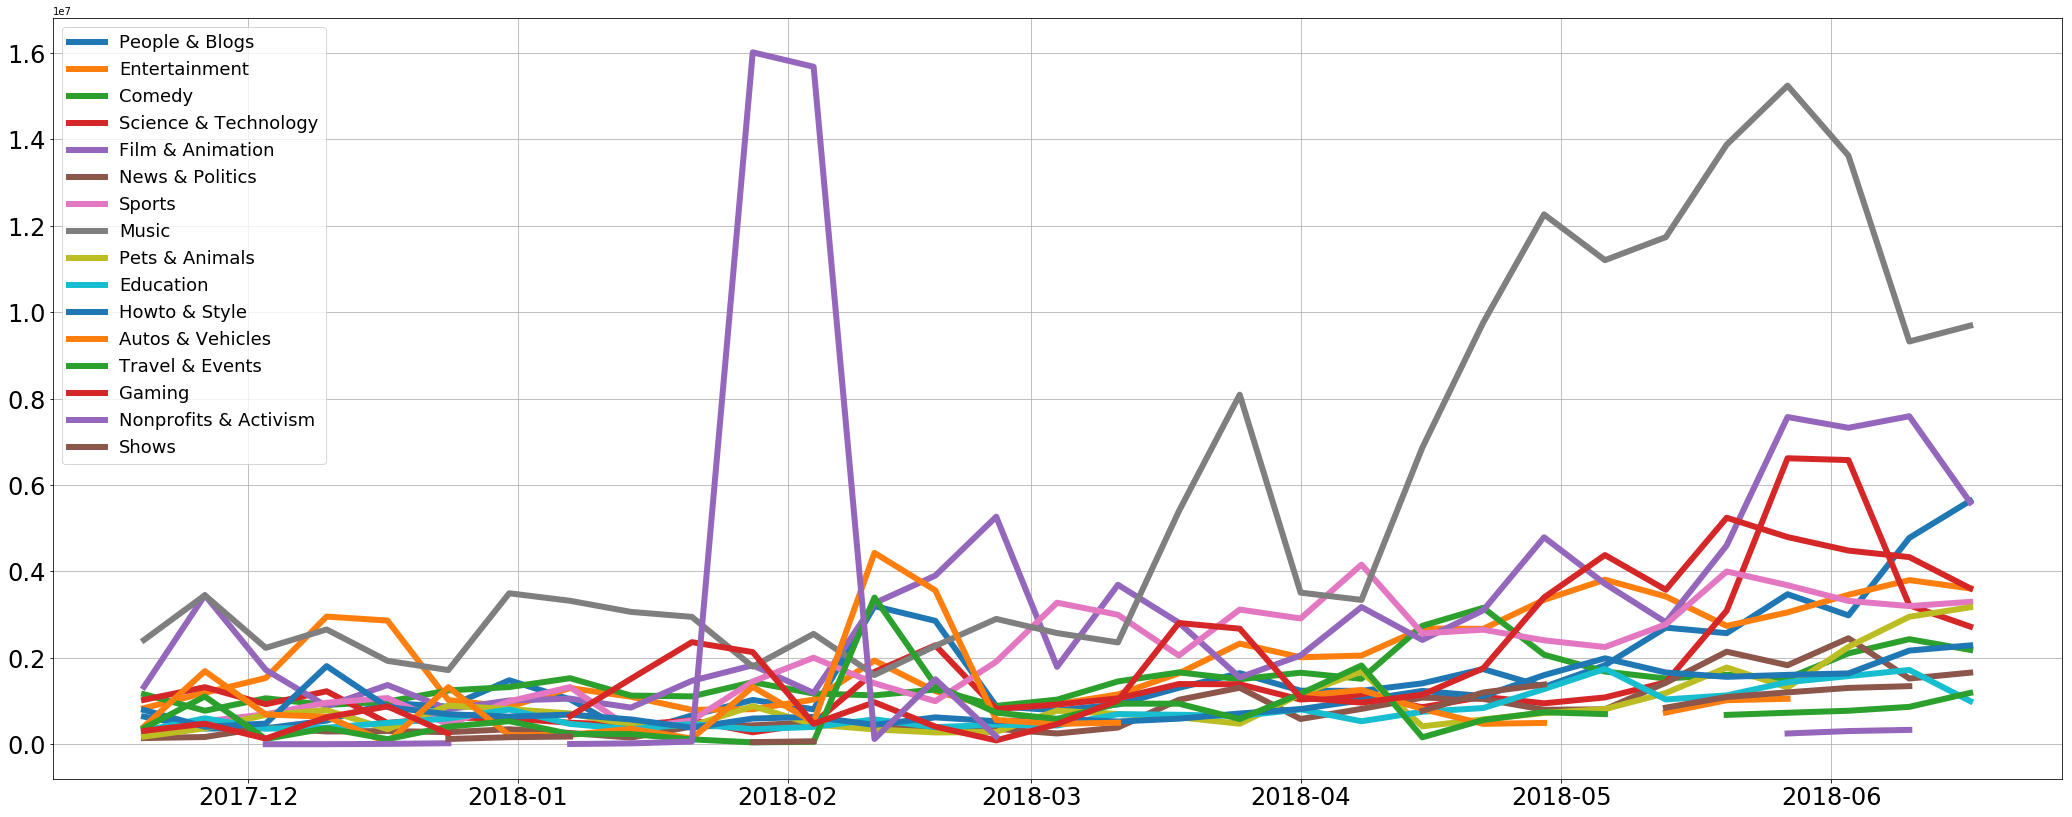

In [509]:
fig = plt.figure(figsize=(36, 14))
ax.grid(True)
for cat in df.CategoryTitle.unique():
    plt.plot(df[df.CategoryTitle==cat].set_index('trending_date').resample('1w').views.mean(),
             linewidth=6)
plt.legend(df.CategoryTitle.unique(), fontsize=18)
plt.yticks(fontsize=24);
plt.xticks(fontsize=24);
plt.grid()
fig.savefig("../weekly_views_by_cat.png")

In [300]:
df[(df.CategoryTitle=="Film & Animation")&(df.trending_date.between("2018-01-16", "2018-02-01"))].sort_values(by="views", ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ratio,CategoryTitle
13192,C6SZa5U8sIg,2018-01-20,Voldemort: Origins of the Heir - An unofficial...,TRYANGLE FILMS,1,2018-01-13 19:59:20,"harrypotter|""jkrowling""|""voldemort""|""voldemort...",10083696,430160,18357,31889,https://i.ytimg.com/vi/C6SZa5U8sIg/default.jpg,False,False,False,Enemies of the Heir...BEWARE!\n\n- SUBTITLES A...,23.433023,Film & Animation
12967,C6SZa5U8sIg,2018-01-19,Voldemort: Origins of the Heir - An unofficial...,TRYANGLE FILMS,1,2018-01-13 19:59:20,"harrypotter|""jkrowling""|""voldemort""|""voldemort...",9474940,414012,17612,31112,https://i.ytimg.com/vi/C6SZa5U8sIg/default.jpg,False,False,False,Enemies of the Heir...BEWARE!\n\n- SUBTITLES A...,23.507381,Film & Animation
12718,C6SZa5U8sIg,2018-01-18,Voldemort: Origins of the Heir - An unofficial...,TRYANGLE FILMS,1,2018-01-13 19:59:20,"harrypotter|""jkrowling""|""voldemort""|""voldemort...",8669309,390174,16515,29993,https://i.ytimg.com/vi/C6SZa5U8sIg/default.jpg,False,False,False,Enemies of the Heir...BEWARE!\n\n- SUBTITLES A...,23.625431,Film & Animation
12468,C6SZa5U8sIg,2018-01-17,Voldemort: Origins of the Heir - An unofficial...,TRYANGLE FILMS,1,2018-01-13 19:59:20,"harrypotter|""jkrowling""|""voldemort""|""voldemort...",7543621,362003,15066,28723,https://i.ytimg.com/vi/C6SZa5U8sIg/default.jpg,False,False,False,Enemies of the Heir...BEWARE!\n\n- SUBTITLES A...,24.027811,Film & Animation
15380,8BAhwgjMvnM,2018-01-31,Pacific Rim Uprising - Official Trailer 2 [HD],Legendary,1,2018-01-24 15:59:54,"pacific rim|""pacific rim uprising""|""legendary ...",7227939,72979,6069,12587,https://i.ytimg.com/vi/8BAhwgjMvnM/default.jpg,False,False,False,"Pacific Rim Uprising – In Theaters, RealD 3D a...",12.024881,Film & Animation


In [15]:
df.groupby("CategoryTitle").trending_date.nunique()

CategoryTitle
Autos & Vehicles         135
Comedy                   205
Education                205
Entertainment            205
Film & Animation         205
Gaming                   191
Howto & Style            205
Music                    205
News & Politics          205
Nonprofits & Activism     53
People & Blogs           205
Pets & Animals           204
Science & Technology     205
Shows                     57
Sports                   205
Travel & Events          174
Name: trending_date, dtype: int64

In [143]:
comedy = df[df.CategoryTitle=="Comedy"].set_index('trending_date').resample('1d').mean().ffill()
music = df[df.CategoryTitle=="Music"].set_index('trending_date').resample('1d').mean().ffill()
sports = df[df.CategoryTitle=="Sports"].set_index('trending_date').resample('1d').mean().ffill()
newsandpolitics = df[df.CategoryTitle=="News & Politics"].set_index('trending_date').resample('1d').mean().ffill()
peopleandblogs = df[df.CategoryTitle=="People & Blogs"].set_index('trending_date').resample('1d').mean().ffill()

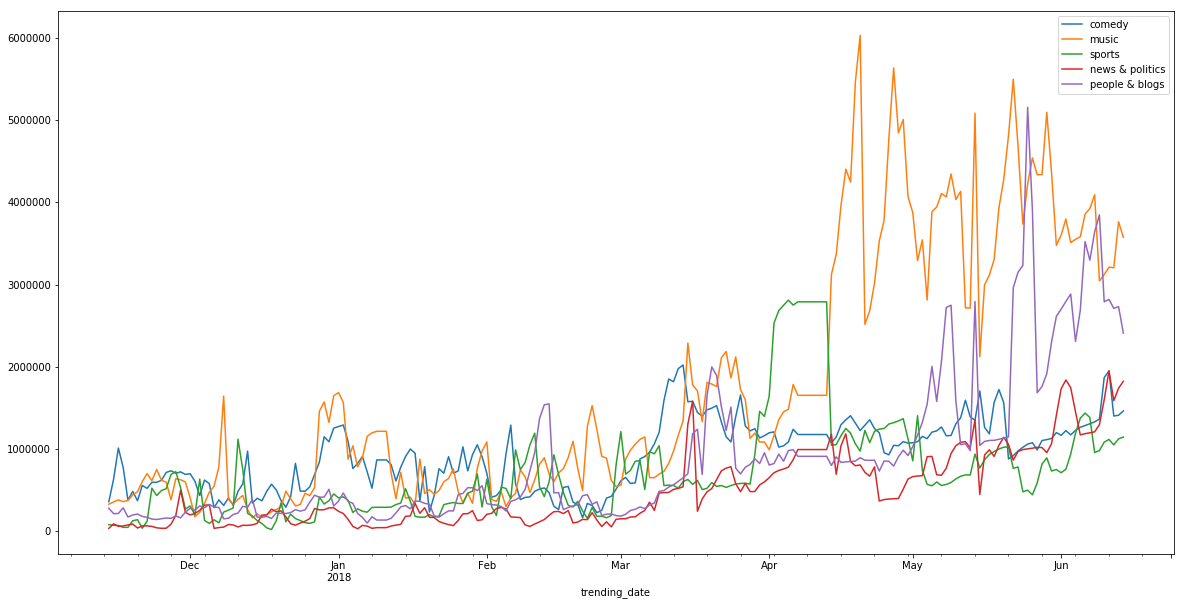

In [17]:
fig = plt.figure(figsize=(20, 10))
comedy.views.plot()
music.views.plot()
sports.views.plot()
newsandpolitics.views.plot()
peopleandblogs.views.plot()
plt.legend(["comedy", "music", "sports", "news & politics", "people & blogs"]);

# Views

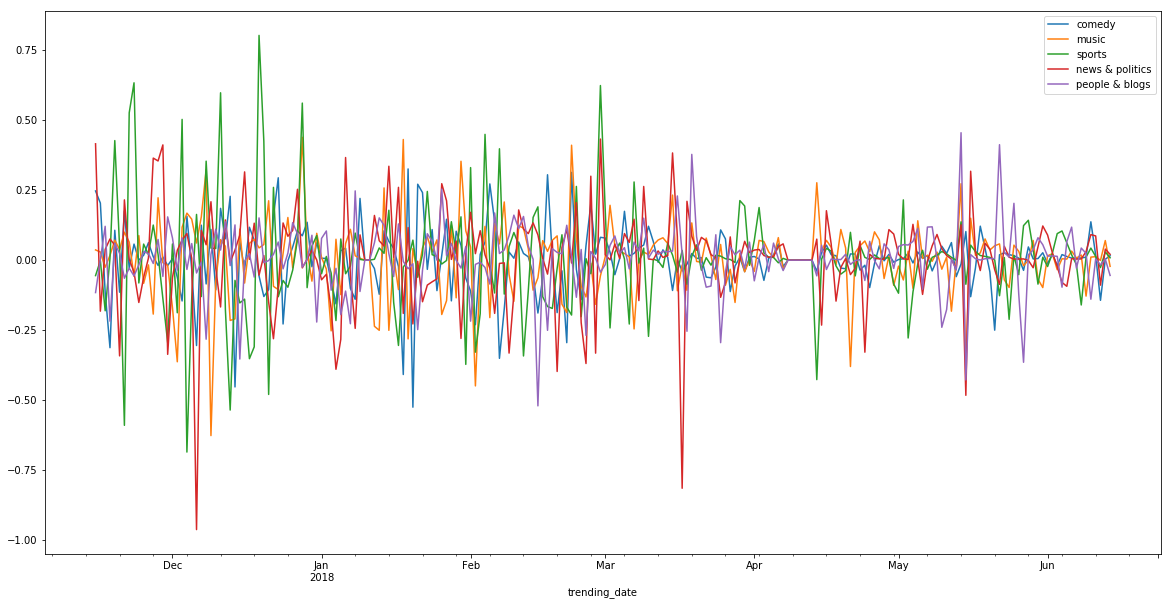

In [52]:
legend = ["comedy", "music", "sports", "news & politics", "people & blogs"]

fig = plt.figure(figsize=(20, 10))
np.log10(comedy.views).diff().plot()
np.log10(music.views).diff().plot()
np.log10(sports.views).diff().plot()
np.log10(newsandpolitics.views).diff().plot()
np.log10(peopleandblogs.views).diff().plot()
plt.legend(legend);

In [146]:
logviews = np.c_[music.views,
                 sports.views,
                 peopleandblogs.views]
legend = ["Music", "Sports", "People & Blogs"]

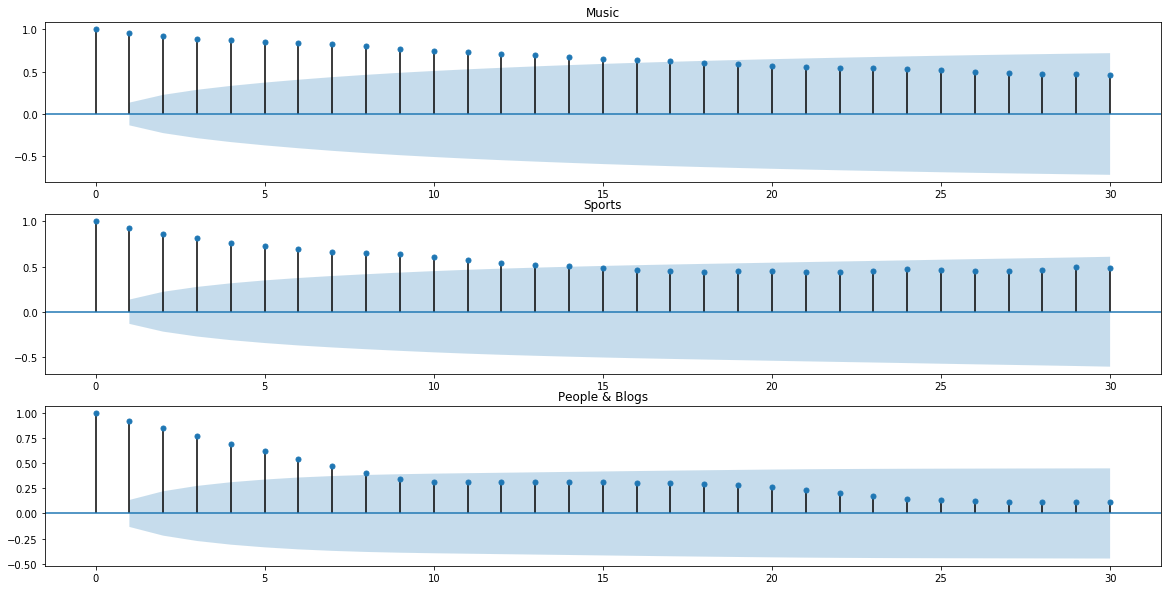

In [150]:
fig, ax = plt.subplots(logviews.shape[1], 1, figsize=(20, 10))
for i in range(logviews.shape[1]):
    plot_acf(logviews[:, i], lags=30, ax=ax[i]);
    ax[i].set_title(legend[i])
fig.savefig("../views_acf.png", bbox_inches="tight")

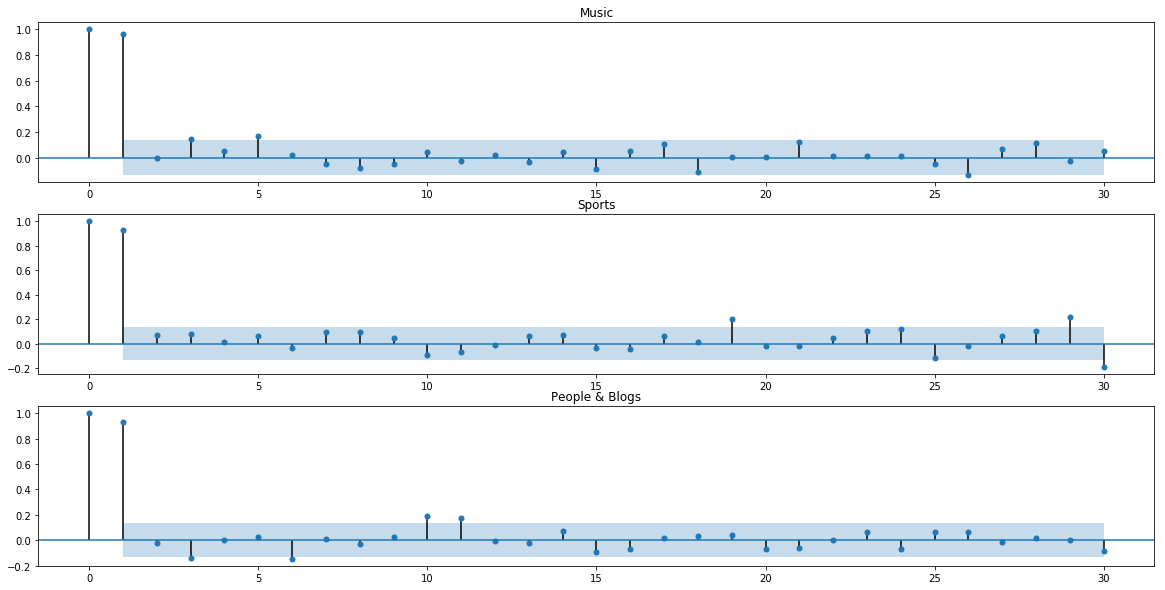

In [149]:
fig, ax = plt.subplots(logviews.shape[1], 1, figsize=(20, 10))
for i in range(logviews.shape[1]):
    plot_pacf(logviews[:, i], lags=30, ax=ax[i]);
    ax[i].set_title(legend[i])
fig.savefig("../views_pacf.png", bbox_inches="tight")

## Difference by 1

In [151]:
logviews = np.c_[music.views.diff(),
                 sports.views.diff(),
                 peopleandblogs.views.diff()][1:]

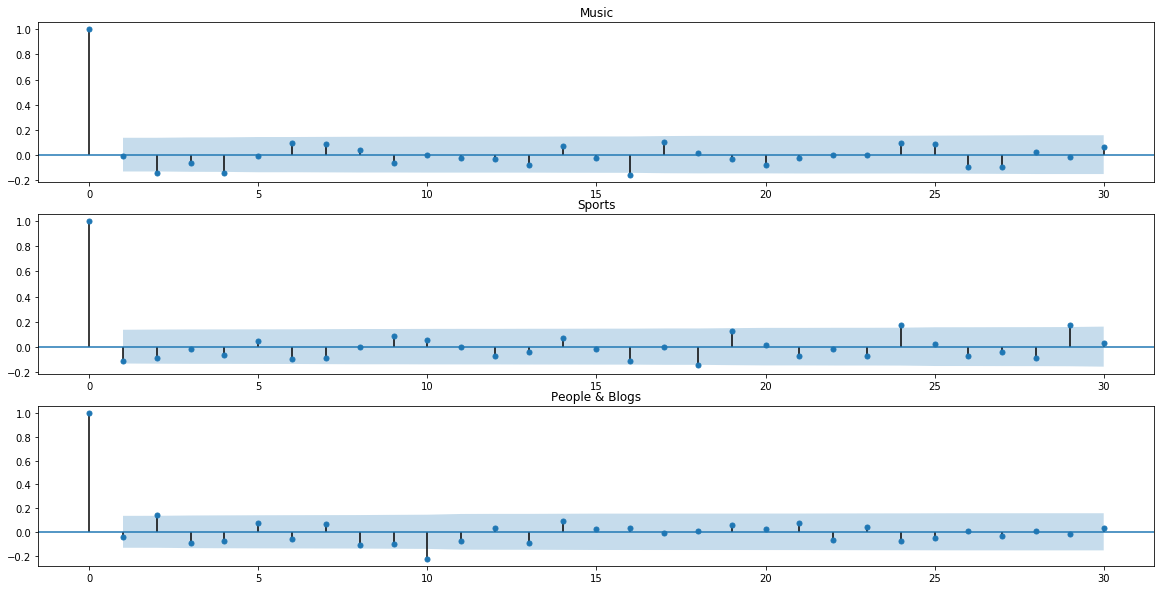

In [152]:
fig, ax = plt.subplots(logviews.shape[1], 1, figsize=(20, 10))
for i in range(logviews.shape[1]):
    plot_acf(logviews[:, i], lags=30, ax=ax[i]);
    ax[i].set_title(legend[i])

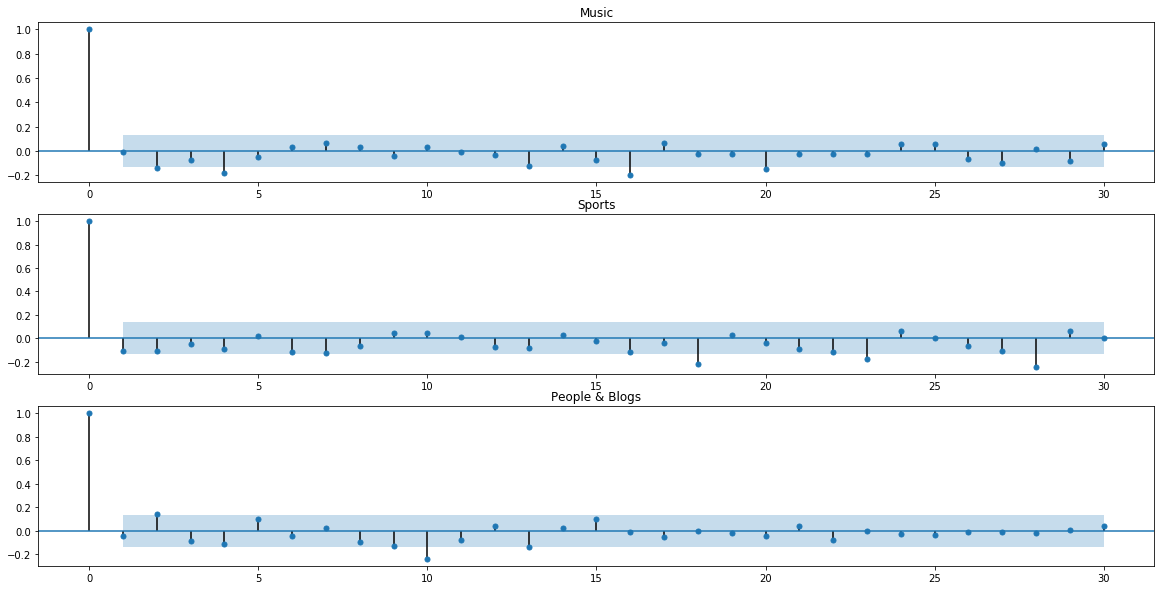

In [153]:
fig, ax = plt.subplots(logviews.shape[1], 1, figsize=(20, 10))
for i in range(logviews.shape[1]):
    plot_pacf(logviews[:, i], lags=30, ax=ax[i]);
    ax[i].set_title(legend[i])

## Model

In [154]:
N = logviews.shape[1]

In [169]:
model = sm.tsa.VARMAX(logviews[:200, :], order=(1, 0)).fit()
model.summary()

Dep. Variable:,"['y1', 'y2', 'y3']",No. Observations:,200
Model:,VAR(1),Log Likelihood,-8838.758
,+ intercept,AIC,17713.516
Date:,"Sun, 02 Dec 2018",BIC,17772.885
Time:,16:16:26,HQIC,17737.542
Sample:,0,,
,- 200,,
Covariance Type:,opg,,
Ljung-Box (Q):,"46.43, 45.11, 41.57",Jarque-Bera (JB):,"572.88, 516.67, 17785.19"
Prob(Q):,"0.22, 0.27, 0.40",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"2.56, 0.85, 2.41",Skew:,"-0.86, -1.95, -4.63"


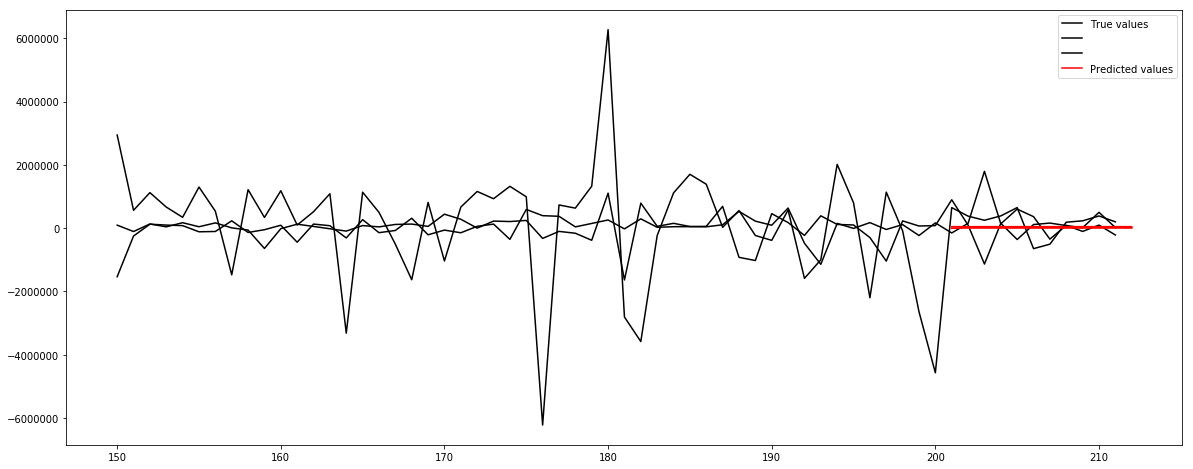

In [164]:
fig = plt.figure(figsize=(20, 8))
plt.plot(np.arange(150, 212), logviews[150:212, :], 'k-');
plt.plot(np.arange(201, 213), model.get_prediction(start=201, end=212).predicted_mean, 'r-');
plt.legend(["True values", "", "", "Predicted values"]);

In [161]:
((model.get_prediction(start=201, end=212).predicted_mean - logviews[200:212, :])**2).sum(0)

array([2.33203415e+13, 2.54166661e+12, 3.96239394e+12])

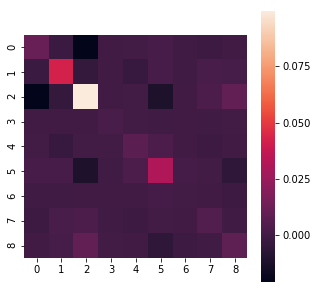

In [160]:
fig = plt.figure(figsize=(5, 5))
sns.heatmap(model.cov_params_opg[N:N+N**2, N:N+N**2], square=True);

# Ratio

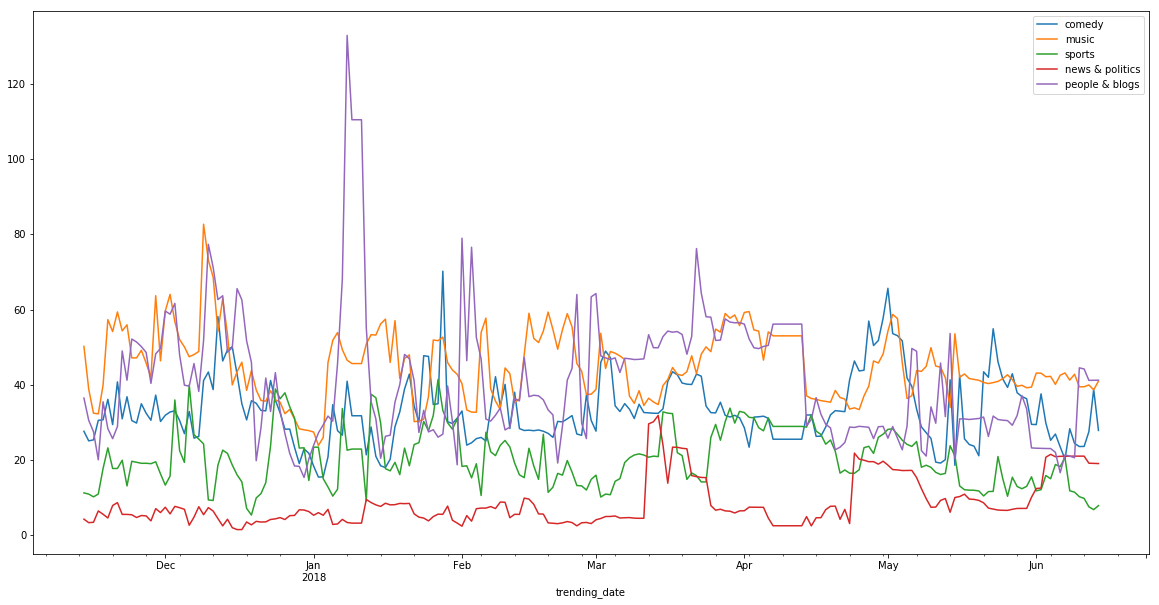

In [18]:
fig = plt.figure(figsize=(20, 10))
comedy.ratio.plot()
music.ratio.plot()
sports.ratio.plot()
newsandpolitics.ratio.plot()
peopleandblogs.ratio.plot()
plt.legend(["comedy", "music", "sports", "news & politics", "people & blogs"]);

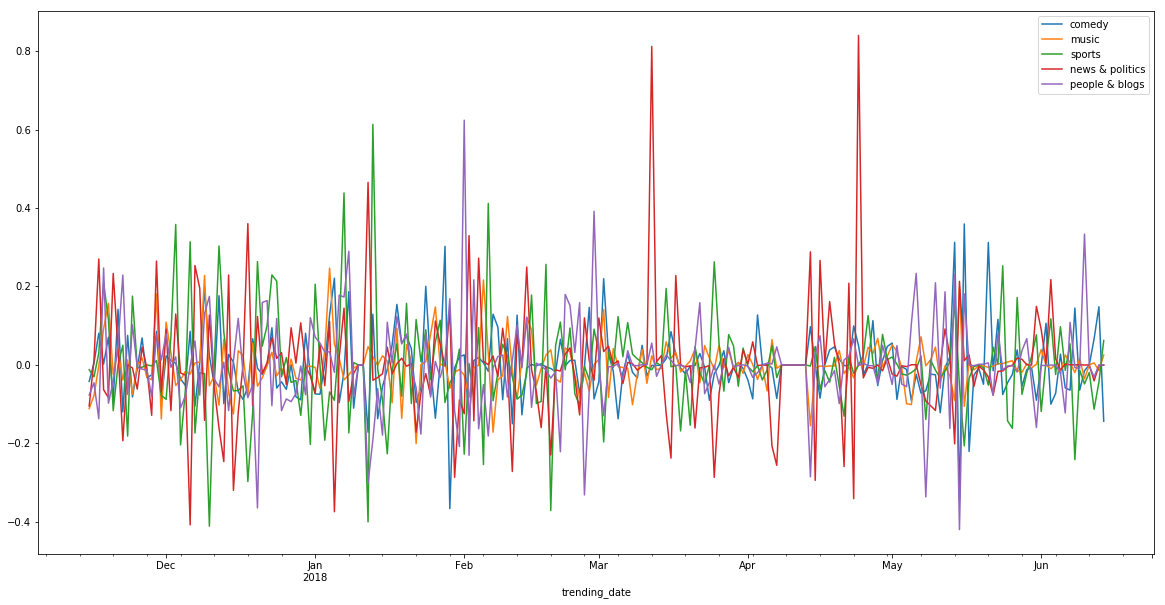

In [117]:
fig = plt.figure(figsize=(20, 10))
np.log10(comedy.ratio).diff().plot()
np.log10(music.ratio).diff().plot()
np.log10(sports.ratio).diff().plot()
np.log10(newsandpolitics.ratio).diff().plot()
np.log10(peopleandblogs.ratio).diff().plot()
plt.legend(["comedy", "music", "sports", "news & politics", "people & blogs"]);

In [173]:
news_likes = df.groupby("trending_date")[["likes", "dislikes"]].mean().values
news_likes = (news_likes-news_likes.mean(0))/news_likes.std(0)

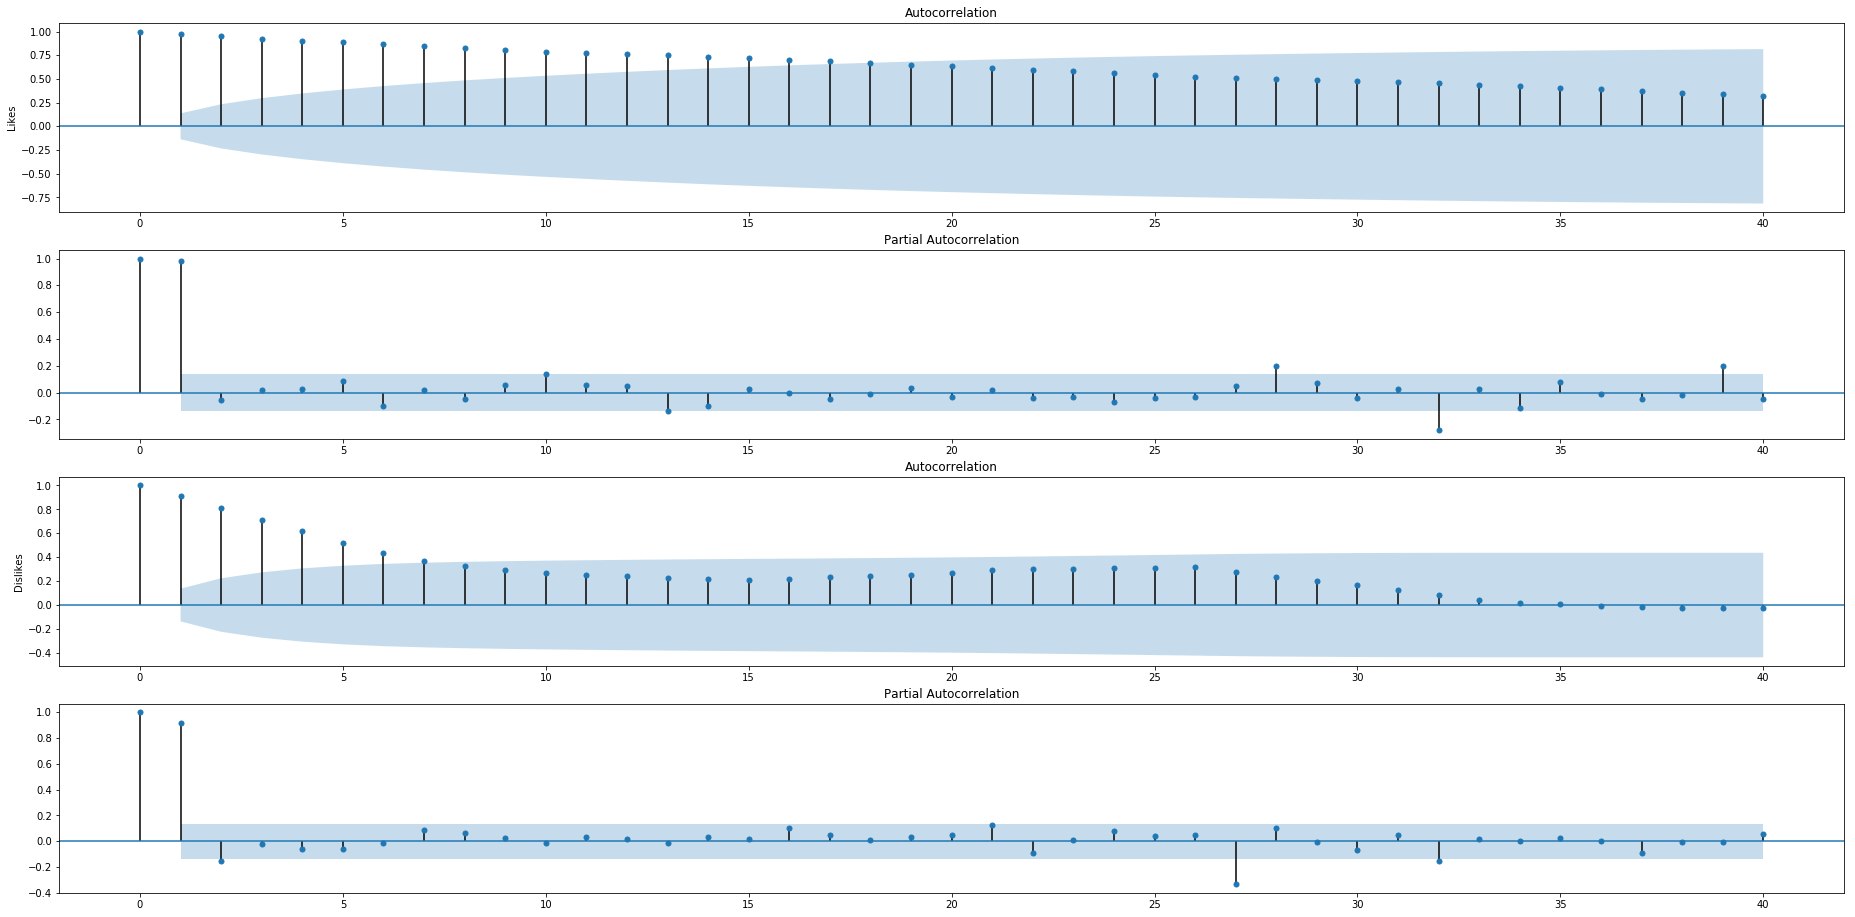

In [174]:
fig, ax = plt.subplots(4, 1, figsize=(32, 16));
plot_acf(news_likes[:, 0], lags=40, ax=ax[0]);
plot_pacf(news_likes[:, 0], lags=40, ax=ax[1]);
ax[0].set_ylabel("Likes")
plot_acf(news_likes[:, 1], lags=40, ax=ax[2]);
plot_pacf(news_likes[:, 1], lags=40, ax=ax[3]);
ax[2].set_ylabel("Dislikes")
fig.savefig("../var_likes-vs-dislikes_acf_plots.png", bbox_inches="tight")

In [336]:
model = sm.tsa.VAR(np.diff(news_likes[:195, :], axis=0)).fit(1)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 02, Dec, 2018
Time:                     16:36:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.65929
Nobs:                     193.000    HQIC:                  -5.71964
Log likelihood:           14.1990    FPE:                 0.00314887
AIC:                     -5.76072    Det(Omega_mle):      0.00305321
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.013226         0.011274            1.173           0.241
L1.y1        -0.019484         0.081401           -0.239           0.811
L1.y2         0.015050         0.031808            0.473           0.636

Results for equation 

In [483]:
sim_len = 20
nsim = 1000
simulated_data = np.zeros((sim_len, 2, nsim))
for i in range(nsim):
    simulated_data[:, :, i] = model.simulate_var(sim_len).cumsum(0) + news_likes[195, :]

In [484]:
sim_mean = simulated_data.mean(2)
sim_std = simulated_data.std(2)

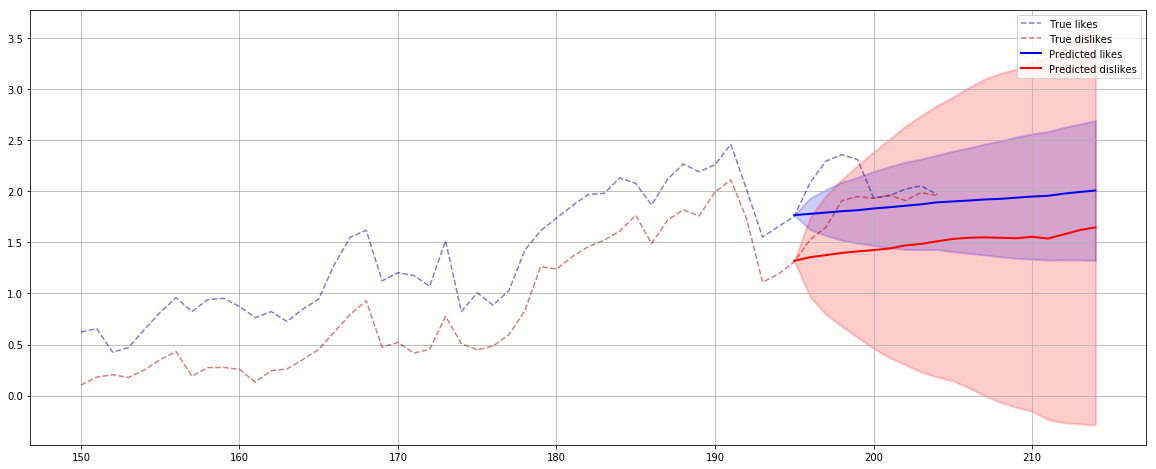

In [486]:
fig = plt.figure(figsize=(20, 8))
true_start = 150
true_end = 205
start = 195
end = start+sim_len
plt.plot(np.arange(true_start, true_end),
         news_likes[true_start:end, 0],
         color='#0000aa',
         alpha=0.5,
         linestyle='--');
plt.plot(np.arange(true_start, true_end),
         news_likes[true_start:end, 1],
         color='#aa0000',
         alpha=0.5,
         linestyle='--');
plt.plot(np.arange(start, end), sim_mean[:, 0], color='#0000ff', linewidth=2);
plt.plot(np.arange(start, end), sim_mean[:, 1], color='#ff0000', linewidth=2);
plt.fill_between(np.arange(start, end),
                 sim_mean[:, 0]-sim_std[:, 0],
                 sim_mean[:, 0]+sim_std[:, 0],
                 color='#0000ff',
                 linewidth=2,
                 alpha=0.2);
plt.fill_between(np.arange(start, end),
                 sim_mean[:, 1]-sim_std[:, 1],
                 sim_mean[:, 1]+sim_std[:, 1],
                 color='#ff0000', 
                 linewidth=2,
                 alpha=0.2);
plt.legend(['True likes', 'True dislikes', 'Predicted likes', 'Predicted dislikes']);
plt.grid()

In [183]:
np.sqrt(((model.get_prediction(start=start, end=end-1).predicted_mean - news_likes[start:end, :])**2).sum())

2.954019671086243

# views/likes/dislikes

In [109]:
stat_cols = ["views", "likes", "dislikes", "comment_count"]
stats = df[df.CategoryTitle=="People & Blogs"].groupby("trending_date")[stat_cols].median().values

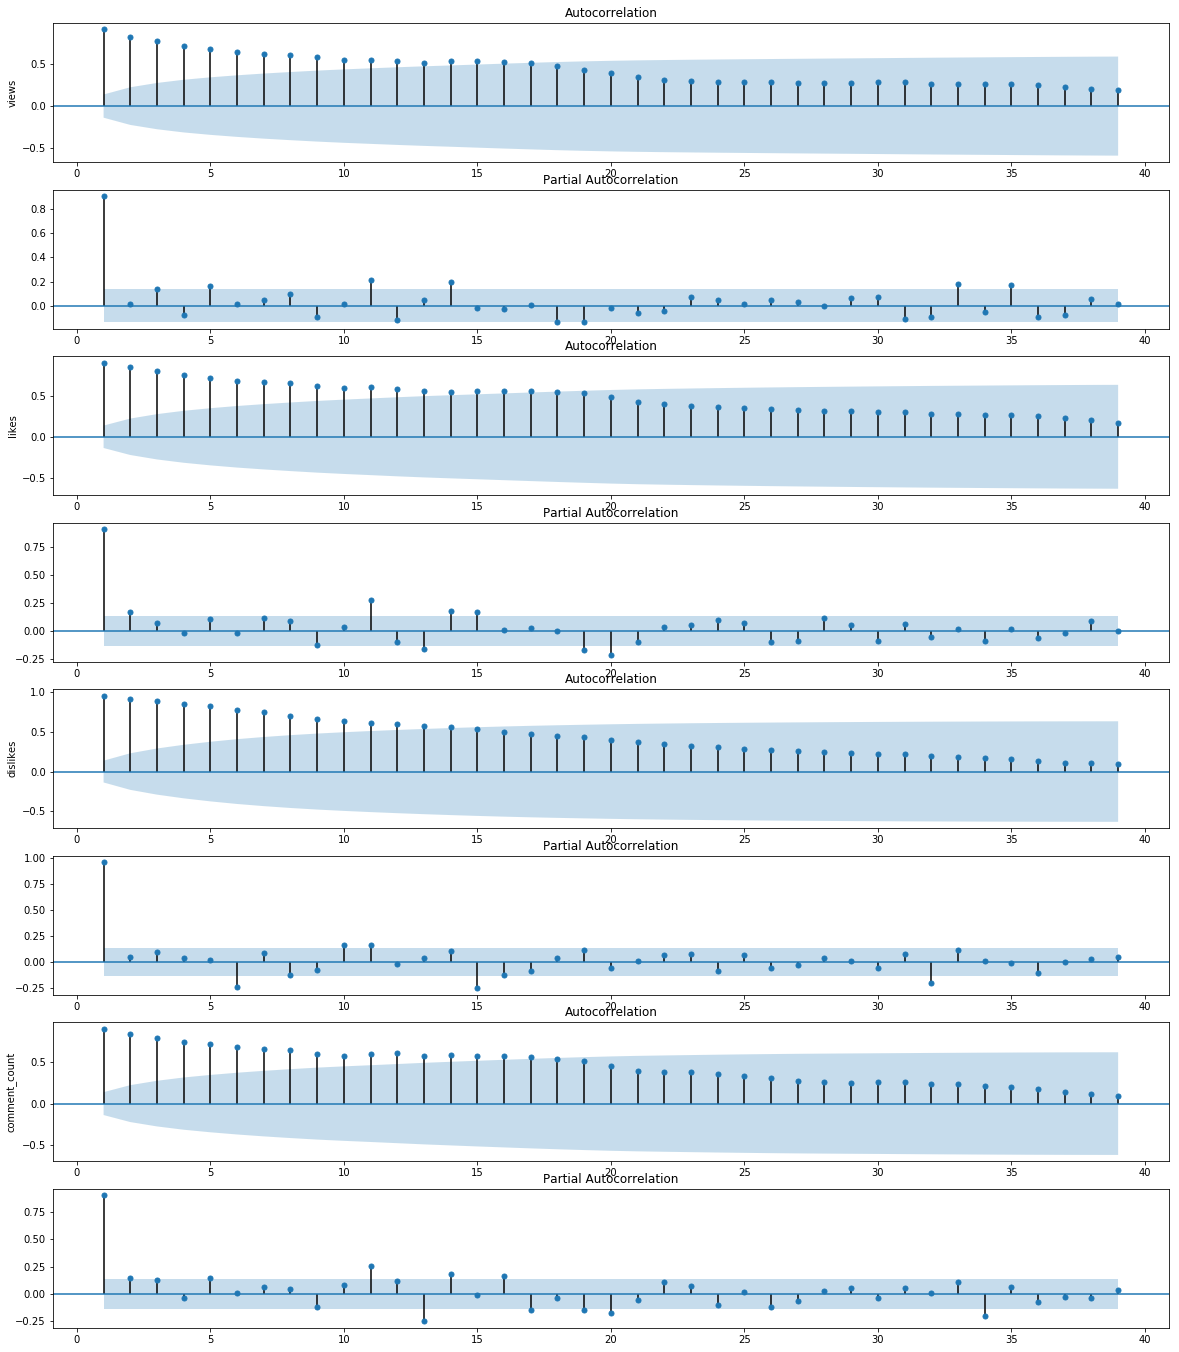

In [93]:
fig, ax = plt.subplots(stats.shape[1]*2, 1, figsize=(20, 24));
for i in range(0, stats.shape[1]):
    plot_acf(stats[:, i], lags=range(1, 40), ax=ax[2*i]);
    plot_pacf(stats[:, i], lags=range(1, 40), ax=ax[2*i+1]);
    ax[2*i].set_ylabel(stat_cols[i])

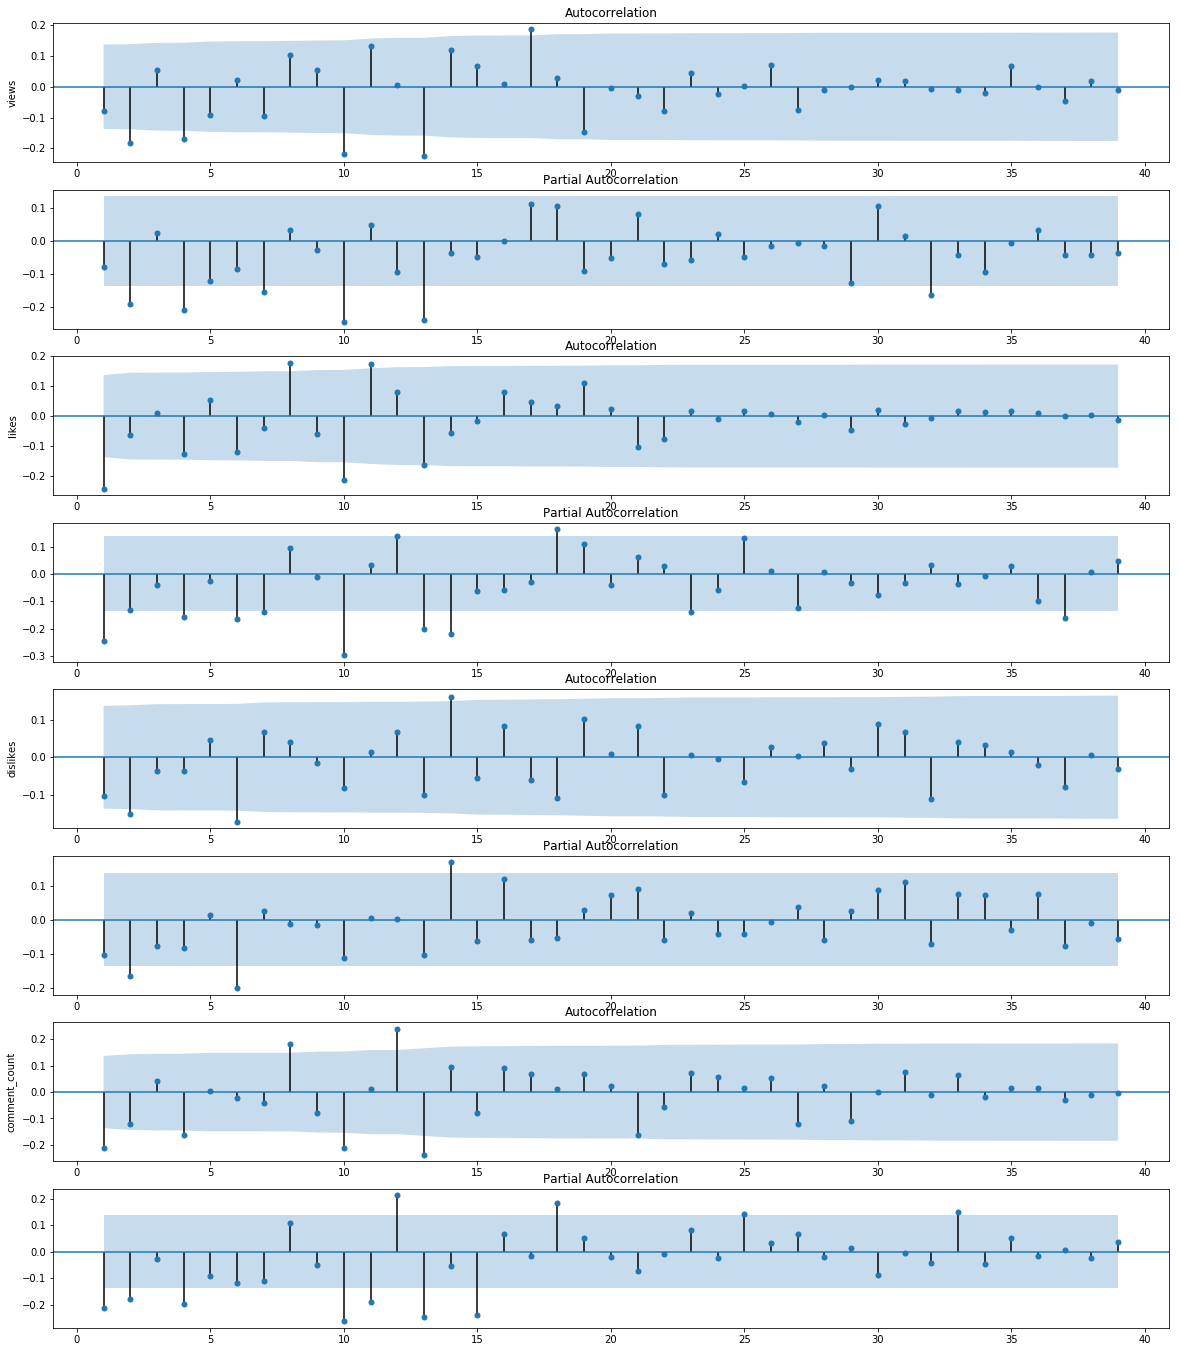

In [94]:
fig, ax = plt.subplots(stats.shape[1]*2, 1, figsize=(20, 24));
for i in range(0, stats.shape[1]):
    plot_acf(np.diff(stats[:, i]), lags=range(1, 40), ax=ax[2*i]);
    plot_pacf(np.diff(stats[:, i]), lags=range(1, 40), ax=ax[2*i+1]);
    ax[2*i].set_ylabel(stat_cols[i])

In [95]:
stats.shape

(205, 4)

In [100]:
model = sm.tsa.VARMAX(stats[:195, :], order=(1, 0)).fit()
model.summary()

Dep. Variable:,"['y1', 'y2', 'y3', 'y4']",No. Observations:,195
Model:,VAR(1),Log Likelihood,-7593.125
,+ intercept,AIC,15246.249
Date:,"Sun, 02 Dec 2018",BIC,15344.439
Time:,12:17:08,HQIC,15286.005
Sample:,0,,
,- 195,,
Covariance Type:,opg,,
Ljung-Box (Q):,"39.38, 54.57, 32.43, 51.70",Jarque-Bera (JB):,"1811.24, 3182.00, 113.50, 242.34"
Prob(Q):,"0.50, 0.06, 0.80, 0.10",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"25.79, 18.28, 1.59, 6.77",Skew:,"1.41, 2.28, 0.15, 0.06"
